In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# t-статистика и степени свободы
t_statistic = 0.313
df = 3

# Расчет p-value (односторонняя, a > b)
p_value = 1 - t.cdf(t_statistic, df)

print(f"p-value = {p_value:.3f}")

p-value = 0.387


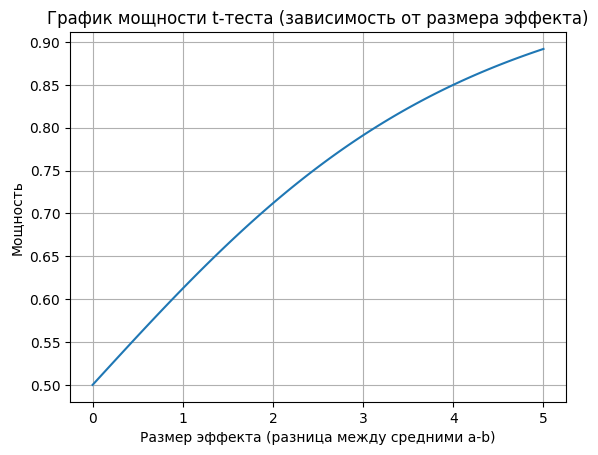

In [2]:

# Фиксированные параметры
x_mean = -1.597  # Среднее X
x_var = 18.325    # Дисперсия X
n = 3             # Размер выборки X
m = 2             # Размер выборки Y
alpha = 0.05      # Уровень значимости

# Расчет выборочных статистик для Y
y = np.array([-2.29, -2.91])  # Исходные значения для выборки Y
y_mean = np.mean(y)           # Среднее Y (зафиксировано)
y_var = np.var(y, ddof=1)      # Дисперсия Y (зафиксирована)

# Диапазон "эффектов" (разница между средними)
effect_sizes = np.linspace(0, 5, 100) # a - b, от 0 до 5

# Функция для вычисления мощности
def calculate_power(effect_sizes, x_var, y_var, n, m, alpha, y_mean):
    power = []
    for effect_size in effect_sizes:
        # Новое среднее X (чтобы получить нужный эффект)
        x_mean = y_mean + effect_size

        # 1. Объединенная оценка дисперсии
        sp_squared = ((x_var * (n - 1)) + (y_var * (m - 1))) / (n + m - 2)

        # 2. t-статистика
        t_statistic = (x_mean - y_mean) / np.sqrt(sp_squared * (1/n + 1/m))

        # 3. Степени свободы
        df = n + m - 2

        # 4. p-value
        p_value = 1 - t.cdf(t_statistic, df)

        # 5. Мощность (используем значение p-value)
        power_val = 1 - p_value

        power.append(power_val)
    return power

# Вычисление мощности
power = calculate_power(effect_sizes, x_var, y_var, n, m, alpha, y_mean)

# Построение графика
plt.plot(effect_sizes, power)
plt.xlabel('Размер эффекта (разница между средними a-b)')
plt.ylabel('Мощность')
plt.title('График мощности t-теста (зависимость от размера эффекта)')
plt.grid(True)
plt.show()